# Semantic segmentation with U-Net

# Flood area segmentation

# 1. Setup kaggle api and download the raw data

## 1.1 Install kaggle dependency

In [1]:
!pip install -q kaggle

## 1.2 Upload kaggle api json file

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hahalim","key":"ce68a07f66f1bdfcaa4088307943d0e2"}'}

## 1.3 Make a hidden directory at root and copy the kaggle file onto the path

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

## 1.4 change the permission status of the file

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

## 1.5 Check if kaggle api is working or not

In [5]:
!kaggle datasets list

ref                                                    title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/cats-dataset                                   🐾 Cats Dataset                            6KB  2024-07-31 06:12:49           1702         34  1.0              
priyamchoksi/credit-card-transactions-dataset          Credit Card Transactions Dataset        145MB  2024-07-23 00:31:47           1452         30  1.0              
abhayayare/employee-data-simulation-it-industry        Employee Data Simulation: IT Industry     4KB  2024-07-21 15:26:17           1924         33  1.0              
patricklford/global-ev-sales-2010-2024                 Global EV Sales: 2010-2024               83KB  2024-07-19 13:40:22           2526         35  1.0             

## 1.6 Download the zip file

In [6]:
!kaggle datasets download -d faizalkarim/flood-area-segmentation

Dataset URL: https://www.kaggle.com/datasets/faizalkarim/flood-area-segmentation
License(s): CC0-1.0
 96% 103M/107M [00:04<00:00, 32.0MB/s] 
100% 107M/107M [00:04<00:00, 25.4MB/s]


# 2 Data preprocessing

## 2.1 Unzip

In [7]:
!unzip -q flood-area-segmentation.zip

An `Image` and `Mask` directory will be in the working directory after unzipping.

## 2.2 Define image and mask file path

In [8]:
import os

image_dir = "/content/Image/"
mask_dir = "/content/Mask/"
image_paths = sorted([
    os.path.join(image_dir, fname)
    for fname in os.listdir(image_dir)
    if fname.endswith(".jpg")
])

mask_paths = sorted([
    os.path.join(mask_dir, fname)
    for fname in os.listdir(mask_dir)
    if fname.endswith(".png")
])

print(f"Number of image files: {len(image_paths)}")
print(f"Number of mask files: {len(mask_paths)}")

Number of image files: 290
Number of mask files: 290


In [9]:
for img, mask in zip(image_paths, mask_paths):
    print(img + " | " + mask)

/content/Image/0.jpg | /content/Mask/0.png
/content/Image/1.jpg | /content/Mask/1.png
/content/Image/10.jpg | /content/Mask/10.png
/content/Image/1000.jpg | /content/Mask/1000.png
/content/Image/1001.jpg | /content/Mask/1001.png
/content/Image/1002.jpg | /content/Mask/1002.png
/content/Image/1003.jpg | /content/Mask/1003.png
/content/Image/1004.jpg | /content/Mask/1004.png
/content/Image/1005.jpg | /content/Mask/1005.png
/content/Image/1006.jpg | /content/Mask/1006.png
/content/Image/1007.jpg | /content/Mask/1007.png
/content/Image/1008.jpg | /content/Mask/1008.png
/content/Image/1009.jpg | /content/Mask/1009.png
/content/Image/1010.jpg | /content/Mask/1010.png
/content/Image/1011.jpg | /content/Mask/1011.png
/content/Image/1012.jpg | /content/Mask/1012.png
/content/Image/1013.jpg | /content/Mask/1013.png
/content/Image/1014.jpg | /content/Mask/1014.png
/content/Image/1015.jpg | /content/Mask/1015.png
/content/Image/1016.jpg | /content/Mask/1016.png
/content/Image/1017.jpg | /content/M

In [ ]:
image_paths

['/content/Image/0.jpg',
 '/content/Image/1.jpg',
 '/content/Image/10.jpg',
 '/content/Image/1000.jpg',
 '/content/Image/1001.jpg',
 '/content/Image/1002.jpg',
 '/content/Image/1003.jpg',
 '/content/Image/1004.jpg',
 '/content/Image/1005.jpg',
 '/content/Image/1006.jpg',
 '/content/Image/1007.jpg',
 '/content/Image/1008.jpg',
 '/content/Image/1009.jpg',
 '/content/Image/1010.jpg',
 '/content/Image/1011.jpg',
 '/content/Image/1012.jpg',
 '/content/Image/1013.jpg',
 '/content/Image/1014.jpg',
 '/content/Image/1015.jpg',
 '/content/Image/1016.jpg',
 '/content/Image/1017.jpg',
 '/content/Image/1018.jpg',
 '/content/Image/1019.jpg',
 '/content/Image/1020.jpg',
 '/content/Image/1021.jpg',
 '/content/Image/1022.jpg',
 '/content/Image/1023.jpg',
 '/content/Image/1024.jpg',
 '/content/Image/1025.jpg',
 '/content/Image/1026.jpg',
 '/content/Image/1027.jpg',
 '/content/Image/1028.jpg',
 '/content/Image/1029.jpg',
 '/content/Image/1030.jpg',
 '/content/Image/1031.jpg',
 '/content/Image/1032.jpg',


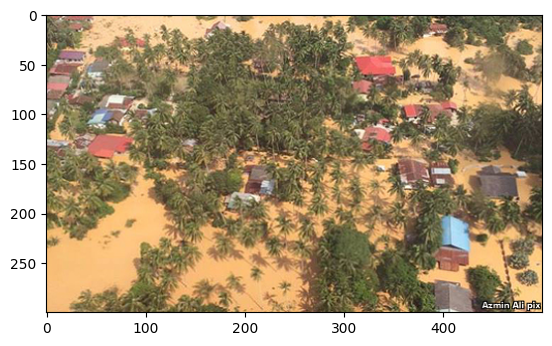

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt

img_sample = cv.imread(image_paths[1])
img_sample = cv.cvtColor(img_sample, cv.COLOR_BGR2RGB)
plt.imshow(img_sample)
plt.show()

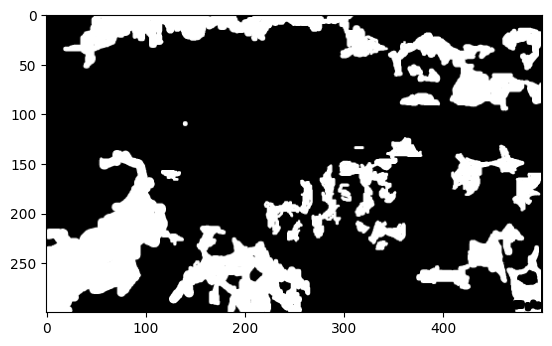

In [11]:
mask_sample = cv.imread(mask_paths[1], cv.IMREAD_GRAYSCALE)
plt.imshow(mask_sample, cmap="gray", vmin=0, vmax=255)
plt.show()

In [12]:
import numpy as np

# store both image and mask
images_list = []
mask_list = []
num_skip = 0
img_size = 256

for img_path, mask_path in zip(image_paths, mask_paths):
    img = cv.imread(img_path)
    if img is None:
        num_skip += 1
        continue
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (img_size, img_size))
    images_list.append(img)

    mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
    mask = cv.resize(mask, (img_size, img_size), interpolation=cv.INTER_NEAREST)
    mask_list.append(mask)

img_arr = np.array(images_list)
mask_arr = np.array(mask_list)

In [13]:
print(img_arr.shape)
print(mask_arr.shape)

(289, 256, 256, 3)
(289, 256, 256)


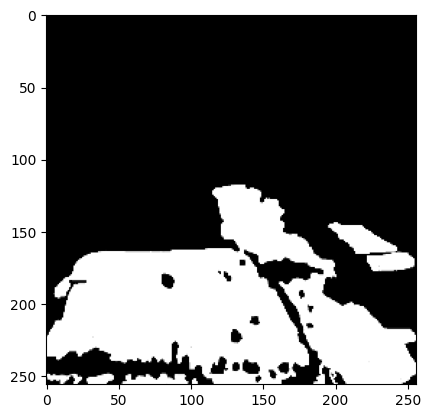

In [14]:
plt.imshow(mask_arr[1], cmap="gray", vmin=0, vmax=255)
plt.show()

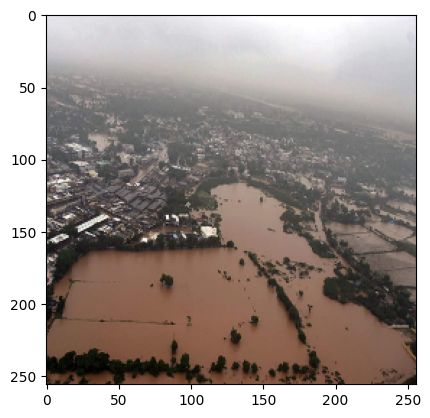

In [15]:
plt.imshow(img_arr[1])
plt.show()

# 3 Partition data

In [16]:
mask_arr = (mask_arr / 255).astype(np.int32)
mask_arr = mask_arr[..., np.newaxis]

num_val = 49
num_test = 40

val_data = img_arr[:num_val]
val_label = mask_arr[:num_val]
test_data = img_arr[num_val: (num_test + num_val)]
test_label = mask_arr[num_val: (num_test + num_val)]
train_data = img_arr[(num_test + num_val):]
train_label = mask_arr[(num_test + num_val):]

print(len(train_label))
print(len(test_label))
print(len(val_label))

200
40
49


In [17]:
train_label.shape

(200, 256, 256, 1)

In [ ]:
train_label.max()

1

# 4 Build model architecture

In [18]:
from keras import layers

def double_conv_block(x, n_filters):
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu",
                      kernel_initializer="he_normal")(x)
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu",
                      kernel_initializer="he_normal")(x)
    return x

def downsample_block(x, n_filters, dropout=True):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    if dropout:
        p = layers.Dropout(0.3)(p)

    return f, p

def upsample_block(x, feature_map, n_filters, dropout=True):
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)

    x = layers.concatenate([x, feature_map])
    if dropout:
        x = layers.Dropout(0.3)(x)

    x = double_conv_block(x, n_filters)

    return x

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_datagen = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

mask_datagen = ImageDataGenerator(
    horizontal_flip=True
)

seed = 10

image_generator = image_datagen.flow(train_data, batch_size=batch_size, seed=seed)
mask_generator = mask_datagen.flow(train_label, batch_size=batch_size, seed=seed)

train_generator = zip(image_generator, mask_generator)

In [19]:
import keras
# inputs
inputs = keras.Input(shape=(img_size, img_size, 3))

# encoder
x = layers.Rescaling(1 / 255.0)(inputs)
f1, p1 = downsample_block(x, 32)

f2, p2 = downsample_block(p1, 64)

f3, p3 = downsample_block(p2, 128)

f4, p4 = downsample_block(p3, 256)

# bottleneck
f5 = double_conv_block(p4, 512)

# decoder
u4 = upsample_block(f5, f4, 256)

u3 = upsample_block(u4, f3, 128)

u2 = upsample_block(u3, f2, 64)

u1 = upsample_block(u2, f1, 32)

# map to output
output = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u1)

unet = keras.Model(inputs, output, name="unet_model")

In [20]:
unet.summary()

Model: "unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 32)   │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64, 64, 64)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32, 32, 128)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 256)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)  

 Total params: 8,630,497 (32.92 MB)

 Trainable params: 8,630,497 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

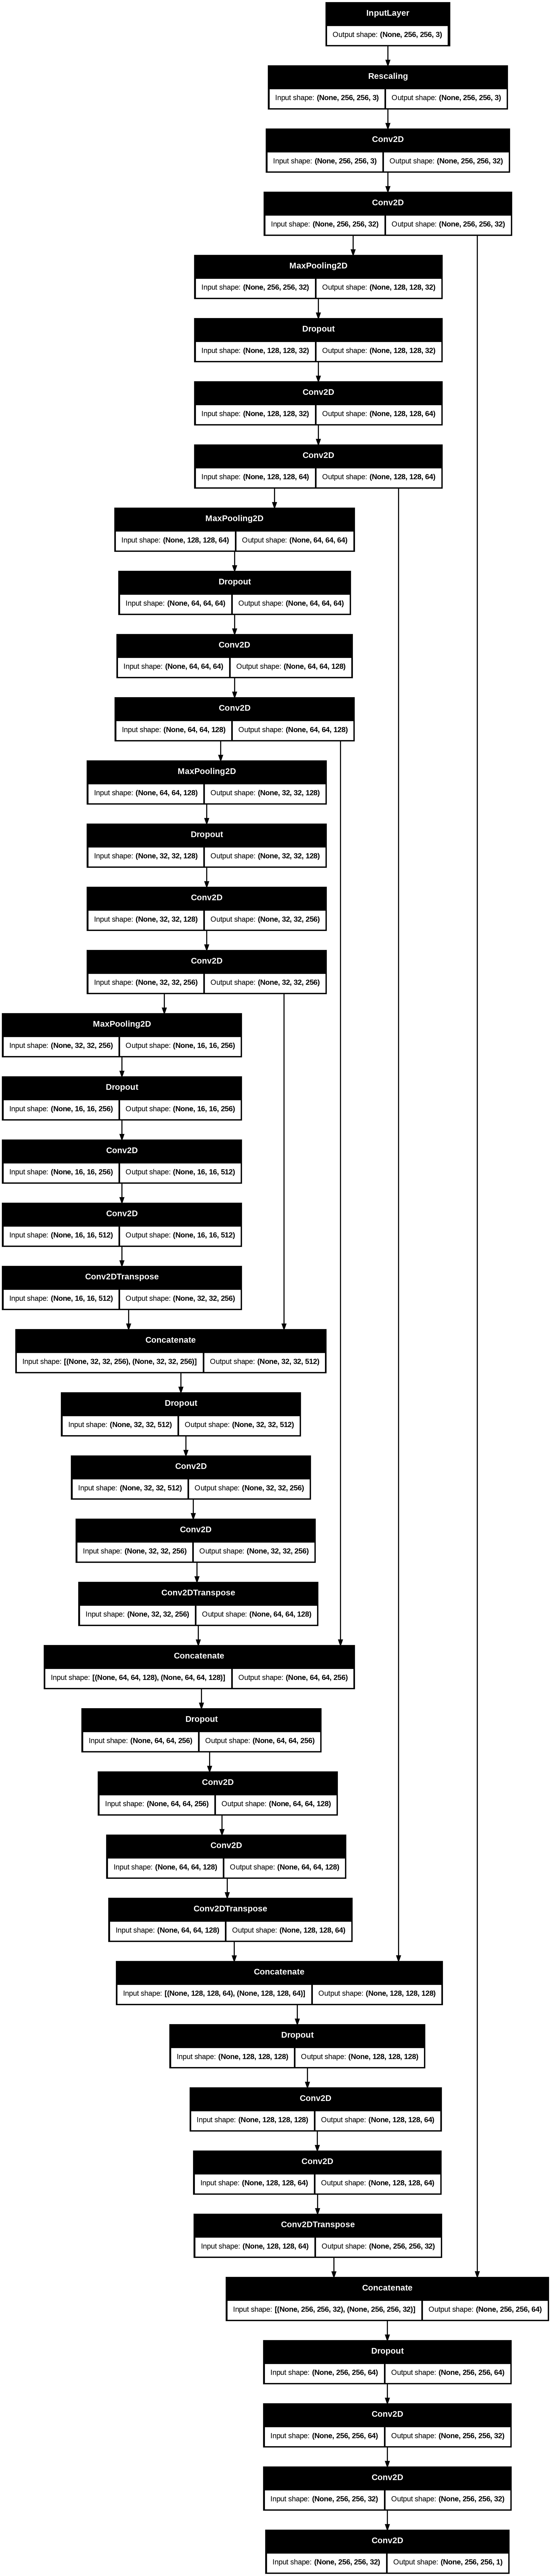

In [ ]:
from keras.utils import plot_model

img_file = "unet_model.png"
plot_model(unet, to_file=img_file, show_shapes=True)

In [22]:
unet.compile(
    # default learning rate of 0.001
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

batch_size = 16
# can choose to set up callbacks
epochs = 20

history = unet.fit(
    train_data,
    train_label,
    steps_per_epoch=len(train_data) // batch_size,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_data, val_label)
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5060 - loss: 0.7390 - val_accuracy: 0.6895 - val_loss: 0.6735
Epoch 2/20
 1/12 ━━━━━━━━━━━━━━━━━━━━ 5:07 28s/step - accuracy: 0.6485 - loss: 0.6762

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.6485 - loss: 0.6762 - val_accuracy: 0.7382 - val_loss: 0.6647
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.7135 - loss: 0.6241 - val_accuracy: 0.7510 - val_loss: 0.4982
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8385 - loss: 0.4377 - val_accuracy: 0.7686 - val_loss: 0.5674
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6854 - loss: 0.7270 - val_accuracy: 0.8073 - val_loss: 0.5061
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7159 - loss: 0.5872 - val_accuracy: 0.7989 - val_loss: 0.5014
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.7956 - loss: 0.4823 - val_accuracy: 0.8153 - val_loss: 0.4373
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8173 - loss: 0.4508 - val_accuracy: 0.8092 - val_loss: 0.4441
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.7966 - loss: 0.4551 - val_accuracy: 0.8073 - val_los

# History (learning curve)

In [27]:
def plot_training(hist):
    # define the needed variables
    tr_acc = hist.history["accuracy"]
    tr_loss = hist.history["loss"]
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    epoch = list(range(1, len(tr_acc)+1))

    # plot training history
    plt.figure(figsize=(12, 6))
    plt.style.use("dark_background")

    plt.subplot(1, 2, 1)
    plt.plot(epoch, tr_loss, 'r', label="training loss")
    plt.plot(epoch, val_loss, 'g', label="validation loss")
    plt.title("training and validation loss")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch, tr_acc, 'r', label="training accuracy")
    plt.plot(epoch, val_acc, 'g', label="validation accuracy")
    plt.title("training and validation accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

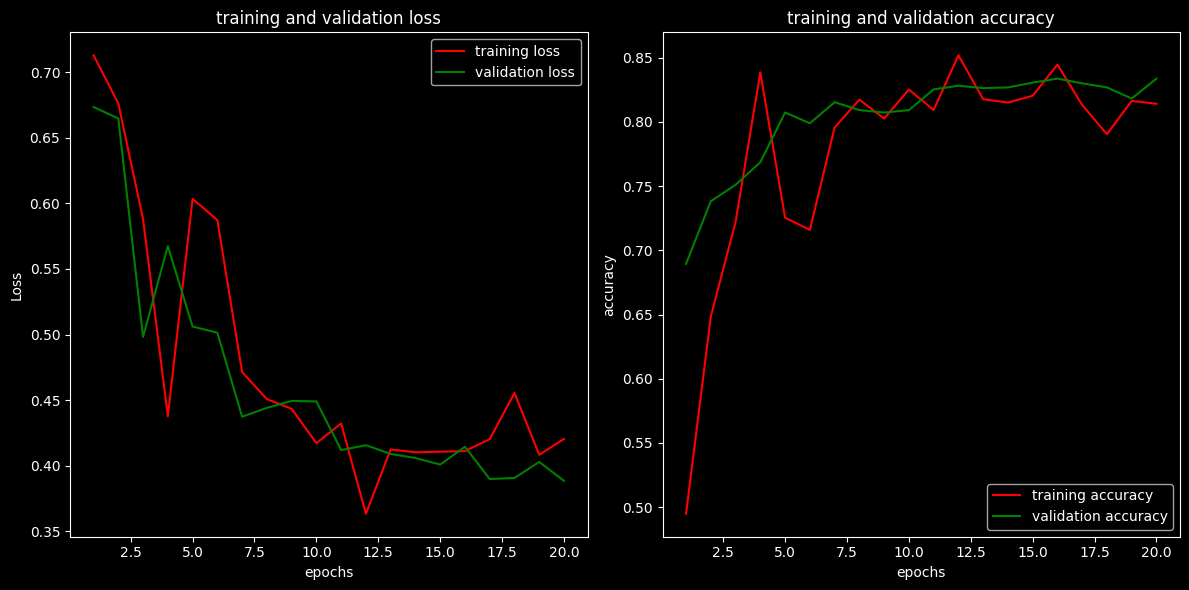

In [28]:
plot_training(history)

# Model evaluation

In [29]:
# evaluate the model
result = unet.evaluate(test_data, test_label)
dict(zip(unet.metrics_names, result))

2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.8132 - loss: 0.3959


{'loss': 0.3884396553039551, 'compile_metrics': 0.8187896609306335}

## 2.3 Display image on browser